# LIDA - Automatic Generation of Visualizations and Infographics using Large Language Models

LIDA is a library for generating data visualizations and data-faithful infographics. LIDA is grammar agnostic (will work with any programming language and visualization libraries e.g. matplotlib, seaborn, altair, d3 etc) and works with multiple large language model providers (OpenAI, PaLM, Cohere, Huggingface). Details on the components of LIDA are described in the [paper here](https://arxiv.org/abs/2303.02927) and in this tutorial [notebook](notebooks/tutorial.ipynb). See the project page [here](https://microsoft.github.io/lida/) for updates!.



## Getting Started | Installation

```bash
pip install -U lida
```

If you intend to use lida with local huggingface models, you will need to install the `transformers` library.

```bash
pip install lida[transformers]
```

## The LIDA Python API

Lida offers a manager class that exposes core functionality of the LIDA system. This tutorial will show you how to use the manager class to create visualizations based on a dataset.

### Multiple LLM Backends
LIDA supports multiple LLM backends such as `openai`, `cohere`, `palm`, `huggingface` etc. You can switch between backends by setting the `text_gen` parameter in the `Manager` class. By default, LIDA uses the `openai` backend. For a list of supported models and how to configure them, see the [llmx documentation](https://github.com/victordibia/llmx).

```python

from lida import llm

text_gen = llm("openai") # for openai
text_gen = llm(provider="openai", api_type="azure", azure_endpoint=os.environ["AZURE_OPENAI_BASE"], api_key=os.environ["AZURE_OPENAI_API_KEY"],    api_version="2023-07-01-preview") # for azure openai
text_gen = llm("cohere") # for cohere
text_gen = llm("palm") # for palm
text_gen = llm(provider="hf", model="uukuguy/speechless-llama2-hermes-orca-platypus-13b", device_map="auto")

lida = Manager(text_gen=text_gen)
```

Note that you can set your llm keys as follows

```bash
export OPENAI_API_KEY=<your key>
export COHERE_API_KEY=<your key>
# for PaLM
export PALM_SERVICE_ACCOUNT_KEY_FILE=<path to gcp service account key file>
export PALM_PROJECT_ID=<your gcp project id>
```
#### Azure OpenAI
```python
from llmx import  llm, TextGenerationConfig
import os

text_gen = llm(
    provider="openai",
    api_type="azure",
    azure_endpoint=os.environ["AZURE_OPENAI_BASE"],
    api_key=os.environ["AZURE_OPENAI_API_KEY"],
    api_version="2023-07-01-preview",
)
lida = Manager(text_gen=text_gen)
```


### Summarization Methods
The summarizer module works takes an `summary_method` argument which determines if the base summary is enriched by an LLM. By default, the `summary_method` argument is set to `default` for a base summary (statistics etc). Set it to `llm` to enrich/annotate the base summary with an llm.

### Caching
Each manager method takes a [`textgen_config`](https://github.com/victordibia/llmx/blob/7c0fc093d1b8780ebebc7e080f5c63991514038b/llmx/datamodel.py#L22C10-L22C10) argument which is a dictionary that can be used to configure the text generation process (with parameters for model, temperature, max_tokens, topk etc). One of the keys in this dictionary is `use_cache`. If set to `True`, the manager will cache the generated text associated with that method. Use for speedup and to avoid hitting API limits.


In [ ]:
pip install lida

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.3/328.3 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.8/173.8 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# !pip install -U lida
# !pip install lida[infographics] # for infographics support

In [ ]:
from lida import Manager, TextGenerationConfig , llm

## Summarize Data, Generate Goals

In [ ]:
text_gen = llm(
    provider="openai",
    api_type="azure",
    azure_endpoint="https://wechatgpt.openai.azure.com/",
    api_key="ae0807d1c48146c38ff998c9abf9b7cc",
    api_version="2024-02-01",
)
lida = Manager(text_gen=text_gen)

In [ ]:
# lida = Manager(text_gen = llm("openai", api_key=None)) # !! api key
textgen_config = TextGenerationConfig(n=1, temperature=0.5, model="gpt-4o", use_cache=True)

summary = lida.summarize("https://raw.githubusercontent.com/uwdata/draco/master/data/cars.csv", summary_method="default", textgen_config=textgen_config)
goals = lida.goals(summary, n=2, textgen_config=textgen_config)

for goal in goals:
    display(goal)


### Goal 0
---
**Question:** What is the relationship between Engine_Size__l_ and Horsepower_HP_ across different car Types?

**Visualization:** `scatter plot with Engine_Size__l_ on the x-axis, Horsepower_HP_ on the y-axis, and different colors for each car Type`

**Rationale:** This visualization will help us understand how engine size correlates with horsepower across different types of cars. By using Type, Engine_Size__l_, and Horsepower_HP_, we can gain insights into the performance characteristics associated with different car types.



### Goal 1
---
**Question:** How do Retail_Price and Dealer_Cost vary across different car Types?

**Visualization:** `box plots of Retail_Price and Dealer_Cost for each car Type`

**Rationale:** By examining the distribution of Retail_Price and Dealer_Cost within each car Type, we can identify pricing patterns and cost structures associated with different types of cars. This will leverage the Retail_Price, Dealer_Cost, and Type fields to provide a comprehensive view of the financial aspects of the car market.


In [ ]:
# goals can also be based on a persona
persona = "a mechanic who wants to buy a car that is cheap but has good gas mileage"
personal_goals = lida.goals(summary, n=2, persona=persona, textgen_config=textgen_config)
for goal in personal_goals:
    display(goal)


### Goal 0
---
**Question:** Which car types offer the best combination of low retail price and high city miles per gallon?

**Visualization:** `scatter plot of Retail_Price vs City_Miles_Per_Gallon, colored by Type`

**Rationale:** By plotting Retail_Price against City_Miles_Per_Gallon and coloring the points by car Type, we can identify which types of cars provide the best balance between affordability and fuel efficiency. This is crucial for a mechanic looking to buy a cost-effective car with good gas mileage.



### Goal 1
---
**Question:** How does the dealer cost compare to the retail price for cars with high highway miles per gallon?

**Visualization:** `scatter plot of Dealer_Cost vs Retail_Price, filtered by cars with Highway_Miles_Per_Gallon >= 30`

**Rationale:** This scatter plot allows us to evaluate the relationship between dealer cost and retail price specifically for cars that have high highway miles per gallon. This insight helps the mechanic understand the cost structure and potential savings when buying fuel-efficient cars.


## Generate Visualizations

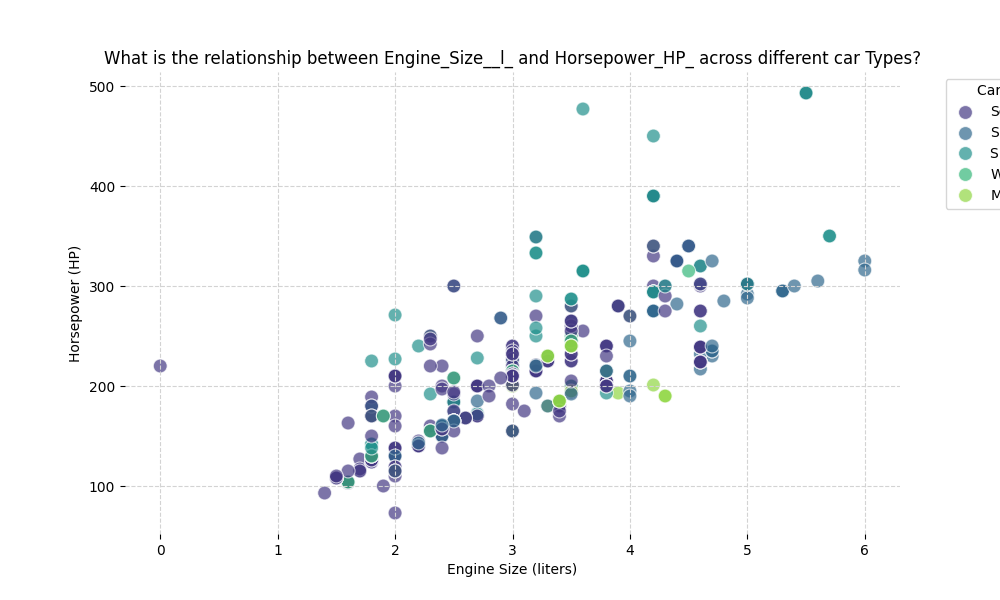

In [ ]:
i = 0
library = "seaborn"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal=goals[i], textgen_config=textgen_config, library=library)
charts[0]

### Generate visualization via a "user query"   

<string>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



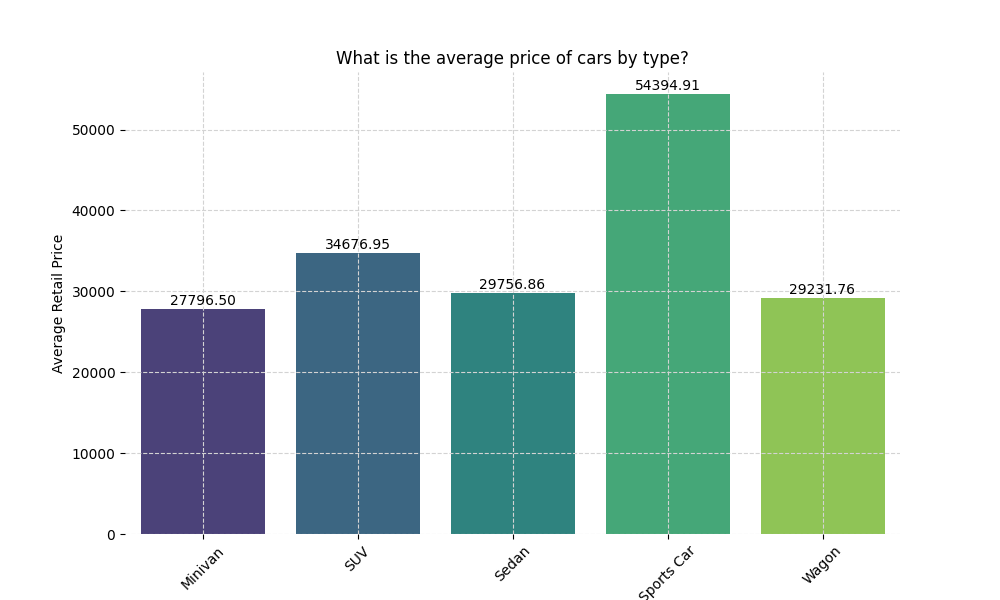

In [ ]:
user_query = "What is the average price of cars by type?"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal=user_query, textgen_config=textgen_config)
charts[0]

# VizOps

Given that LIDA represents visualizations as code,
the VISGENERATOR also implements submodules
to perform operations on this representation.

This includes
- **Natural language based visualization refinement**: Provides a conversational api to iteratively
4Execution in a sandbox environment is recommended.
refine generated code (e.g., translate chart t hindi
. . . zoom in by 50% etc) which can then be executed to generate new visualizations.
- **Visualization explanations and accessibility**:
Generates natural language explanations (valuable
for debugging and sensemaking) as well as accessibility descriptions (valuable for supporting users
with visual impairments).

- **Visualization code self-evaluation and repair**:
Applies an LLM to self-evaluate generated code on
multiple dimensions (see section 4.1.2).

- **Visualization recommendation**: Given some context (goals, or an existing visualization), recommend additional visualizations to the user (e.g., for
comparison, or to provide additional perspectives).



## Natural language based visualization refinement

Given some code, modify it based on natural language instructions. This yields a new code snippet that can be executed to generate a new visualization.

<string>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



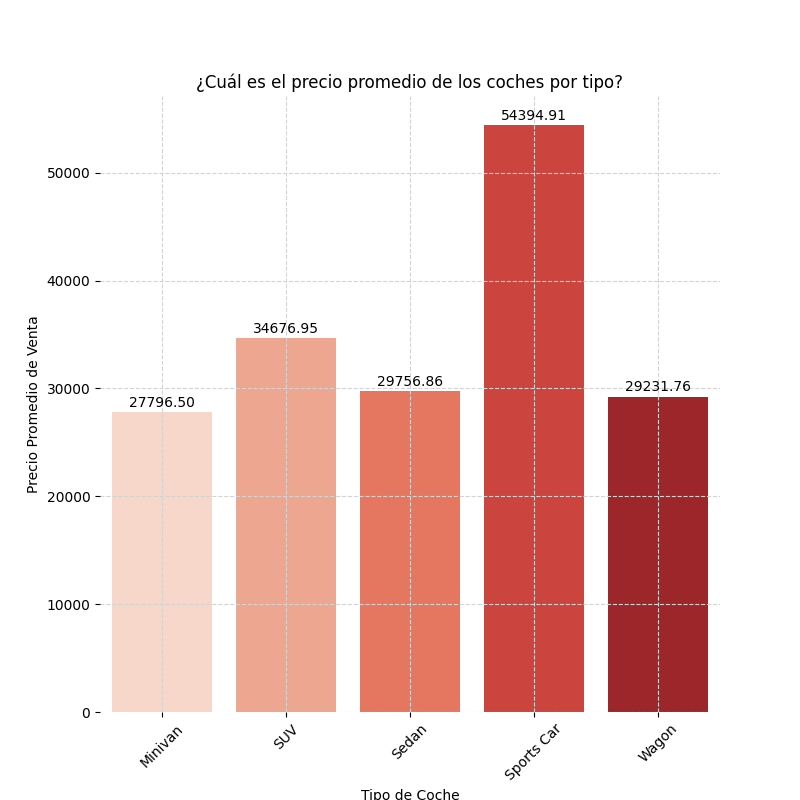

In [ ]:
code = charts[0].code
textgen_config = TextGenerationConfig(n=1, temperature=0, use_cache=True)
instructions = ["make the chart height and width equal", "change the color of the chart to red", "translate the chart to spanish"]
edited_charts = lida.edit(code=code,  summary=summary, instructions=instructions, library=library, textgen_config=textgen_config)
edited_charts[0]

## Visualization explanations and accessibility

In [ ]:
explanations = lida.explain(code=code, library=library, textgen_config=textgen_config)
for row in explanations[0]:
    print(row["section"]," ** ", row["explanation"])

accessibility  **  The chart is a bar plot created using Seaborn, with a 'viridis' color palette. The x-axis represents different car types, and the y-axis shows the average retail price for each type. The goal of the chart is to visualize the average retail price of cars by type. The main insights from the chart are the differences in average retail prices among various car types. The x-axis labels are rotated for better readability, and the average prices are displayed above each bar for clarity.
transformation  **  This line of code groups the data by the 'Type' column and calculates the mean of the 'Retail_Price' for each group. The result is a new DataFrame, 'avg_price_by_type', which contains the average retail price for each car type. The 'reset_index()' method is used to convert the grouped data back into a regular DataFrame.
visualization  **  This section of the code creates and customizes the bar plot. 'plt.figure(figsize=(10, 6))' sets the figure size. 'sns.barplot()' creat

## Visualization code self-evaluation and repair

In [ ]:
evaluations = lida.evaluate(code=code,  goal=goals[i], textgen_config=textgen_config, library=library)[0]
for eval in evaluations:
    print(eval["dimension"], "Score" ,eval["score"], "/ 10")
    print("\t", eval["rationale"][:200])
    print("\t**********************************")

bugs Score 4 / 10
	 The code does not contain syntax errors or typos, but it fails to address the specified goal. The goal is to explore the relationship between Engine_Size__l_ and Horsepower_HP_ across different car Ty
	**********************************
transformation Score 3 / 10
	 The data transformation is not appropriate for the specified goal. The code calculates the average Retail_Price by Type, which is irrelevant to the relationship between Engine_Size__l_ and Horsepower_
	**********************************
compliance Score 2 / 10
	 The code does not meet the specified visualization goal at all. It focuses on Retail_Price instead of Engine_Size__l_ and Horsepower_HP_.
	**********************************
type Score 2 / 10
	 A bar plot is not suitable for exploring the relationship between Engine_Size__l_ and Horsepower_HP_. A scatter plot would be more appropriate for visualizing the relationship between two continuous v
	**********************************
encoding Score 2 / 

## Visualization Recommendation

In [ ]:
textgen_config = TextGenerationConfig(n=2, temperature=0.2, use_cache=True)
recommended_charts =  lida.recommend(code=code, summary=summary, n=2,  textgen_config=textgen_config)

<string>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

<string>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



Recommended 2 charts


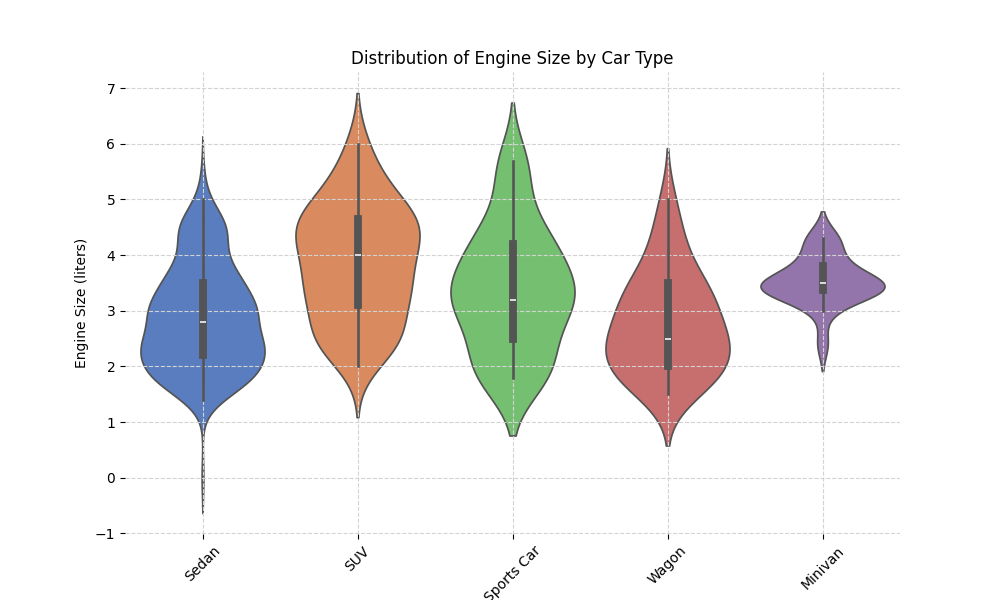

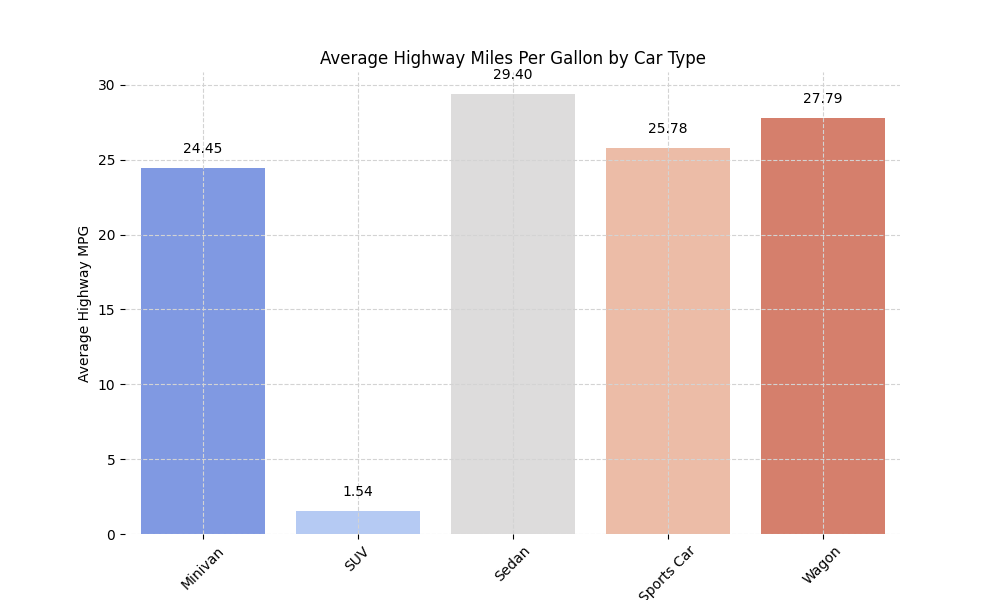

In [ ]:
print(f"Recommended {len(recommended_charts)} charts")
for chart in recommended_charts:
    display(chart)

## Infographics (Beta)

- Explores using LIDA to generate infographics from an existing visualization
- Uses the `peacasso` package, and loads open source stable diffusion models
- You will need to run `pip install lida[infographics]` to install the required dependencies.
- Currently work in progress (work being done to post process infographics with chart axis and title overlays from the original visualization, add presets for different infographic styles, and add more stable diffusion models)


In [ ]:
# !pip install lida[infographics]
# ensure you have a GPU runtime

In [ ]:
infographics = lida.infographics(visualization = edited_charts[0].raster, n=1, style_prompt="pastel art, green pearly rain drops, highly detailed, no blur, white background")

In [ ]:
from lida.utils import plot_raster
plot_raster([edited_charts[0].raster, infographics["images"][0]])